In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [166]:
df=pd.read_excel('heart_disease.xlsx')

In [167]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [168]:
xls = pd.ExcelFile('heart_disease.xlsx')
print("Sheet names:", xls.sheet_names)
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
for sheet_name, df in dfs.items():
    print(f"\nSheet name: {sheet_name}")
    print(df.head())

Sheet names: ['Description', 'Heart_disease']

Sheet name: Description
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...

Sheet name: Heart_disease
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          tha

In [169]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [170]:
df['num'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [172]:
df['fbs']=df['fbs'].astype('object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.3+ KB


In [174]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [175]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [176]:
mean=df['oldpeak'].mean()
df['oldpeak']=df['oldpeak'].fillna(mean)

In [177]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [178]:
df.duplicated().sum()

1

In [179]:
df1=df.drop_duplicates()

In [180]:
df1.duplicated().sum()

0

In [181]:
num_columns=[i for i in df.columns if df[i].dtype!='O']
num_columns

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

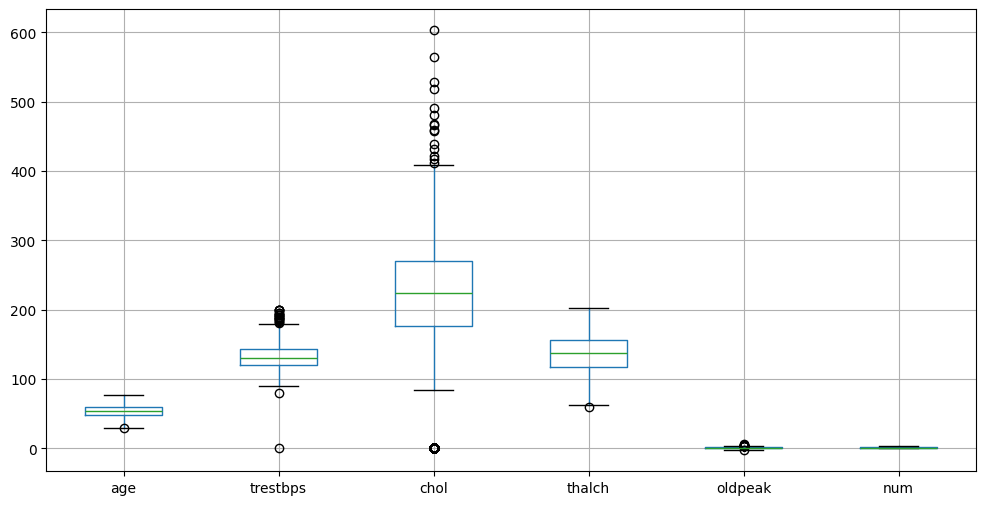

In [182]:
figure=plt.figure(figsize=(12,6))
df.boxplot(column=num_columns)
plt.show()

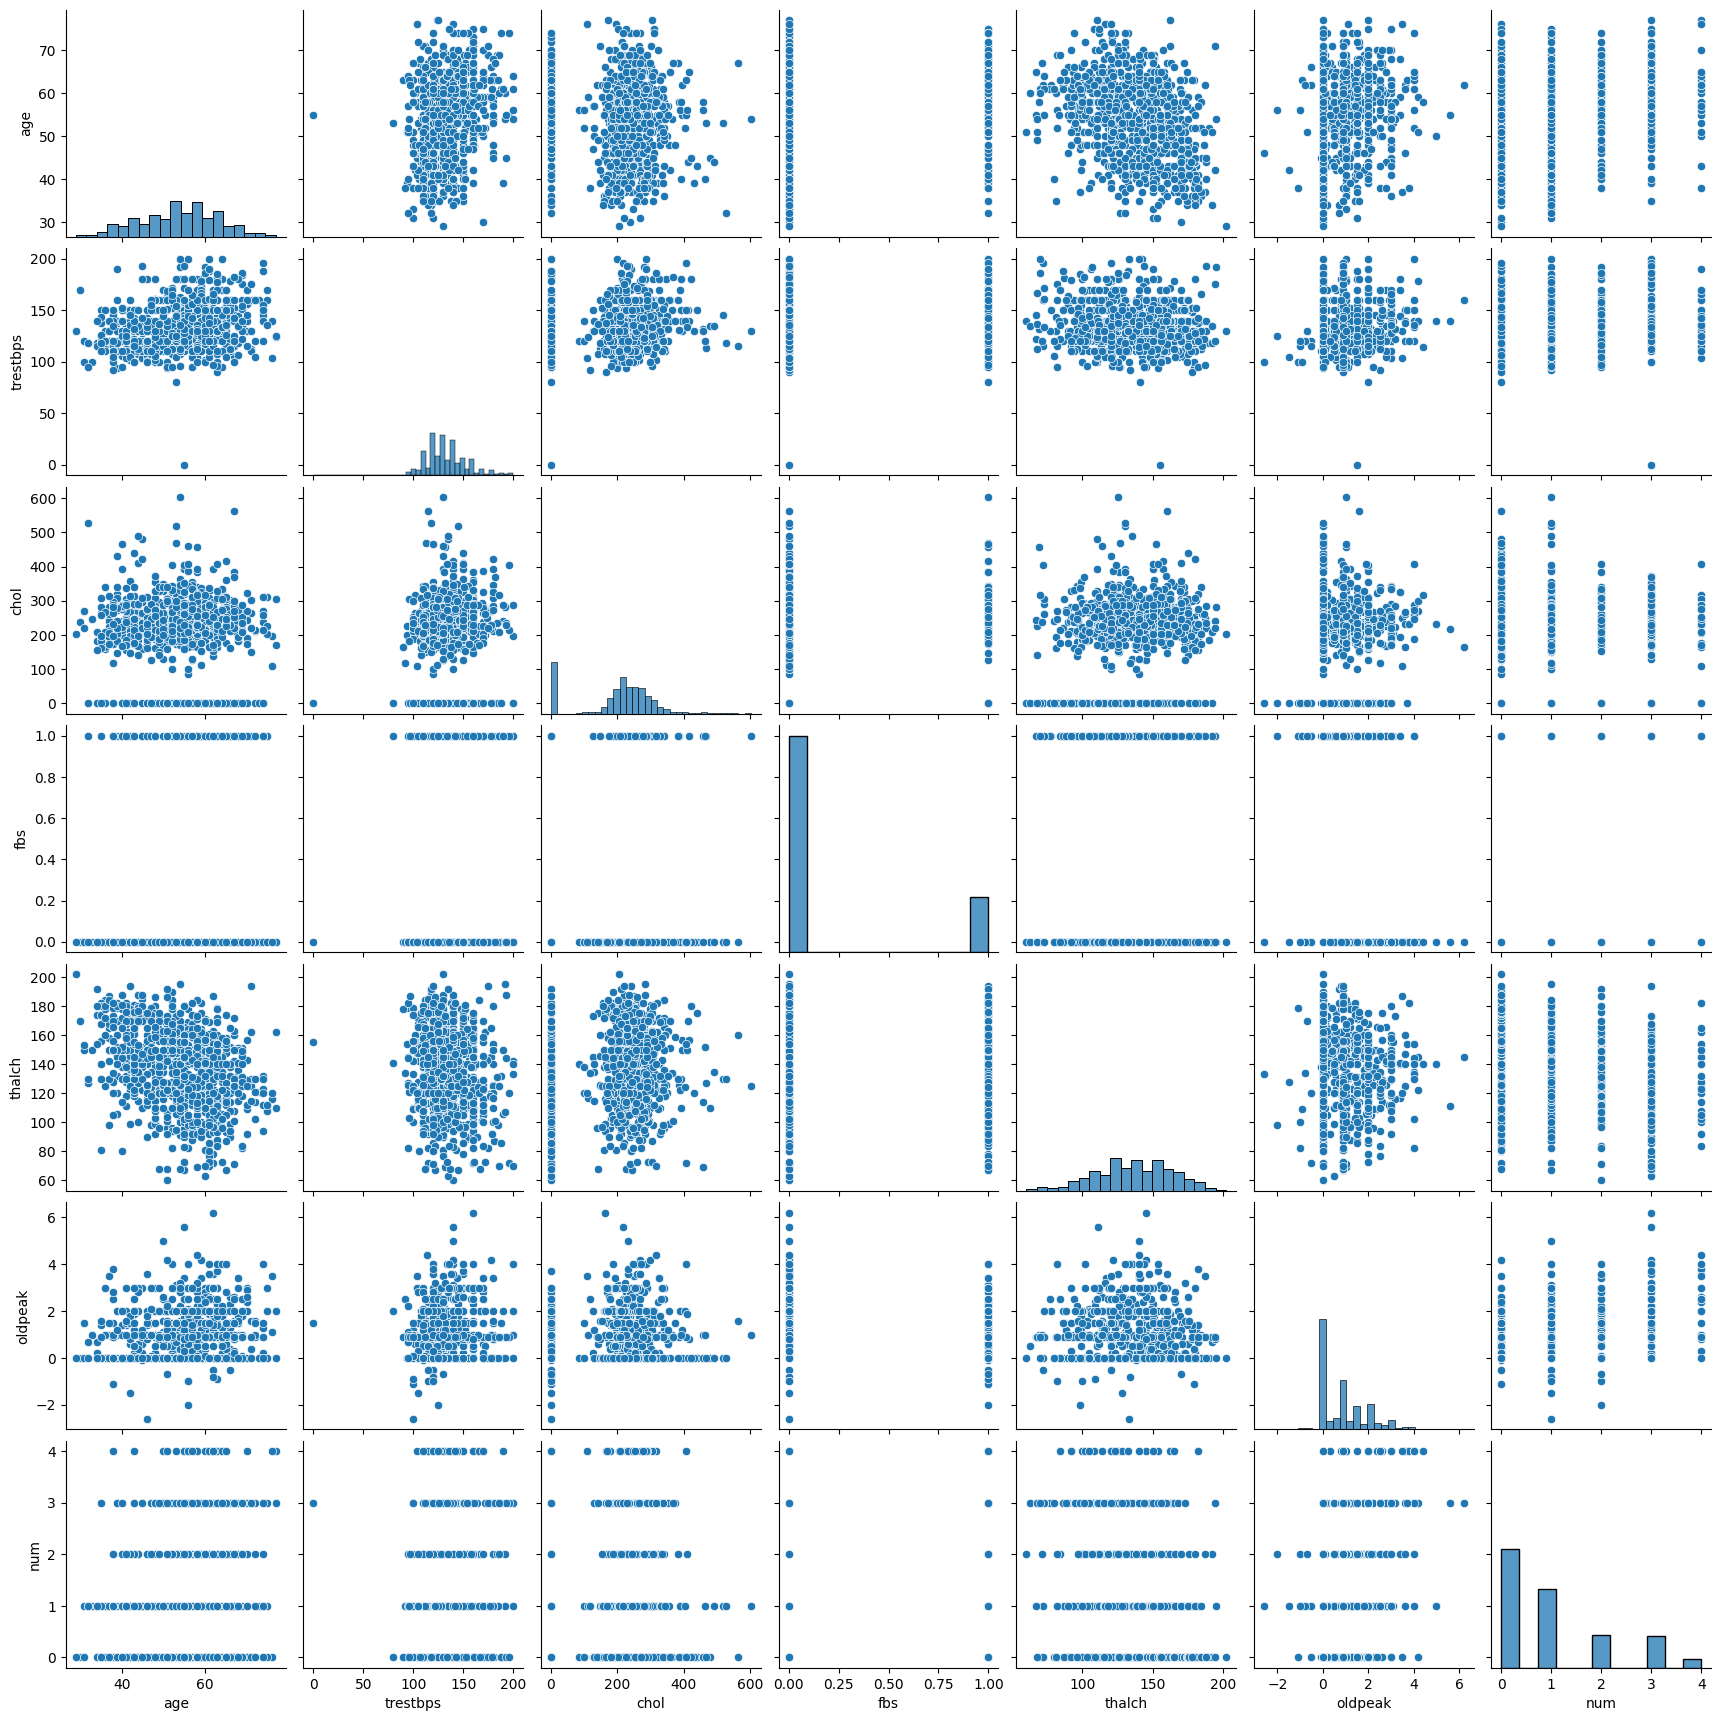

In [183]:
sns.pairplot(df)

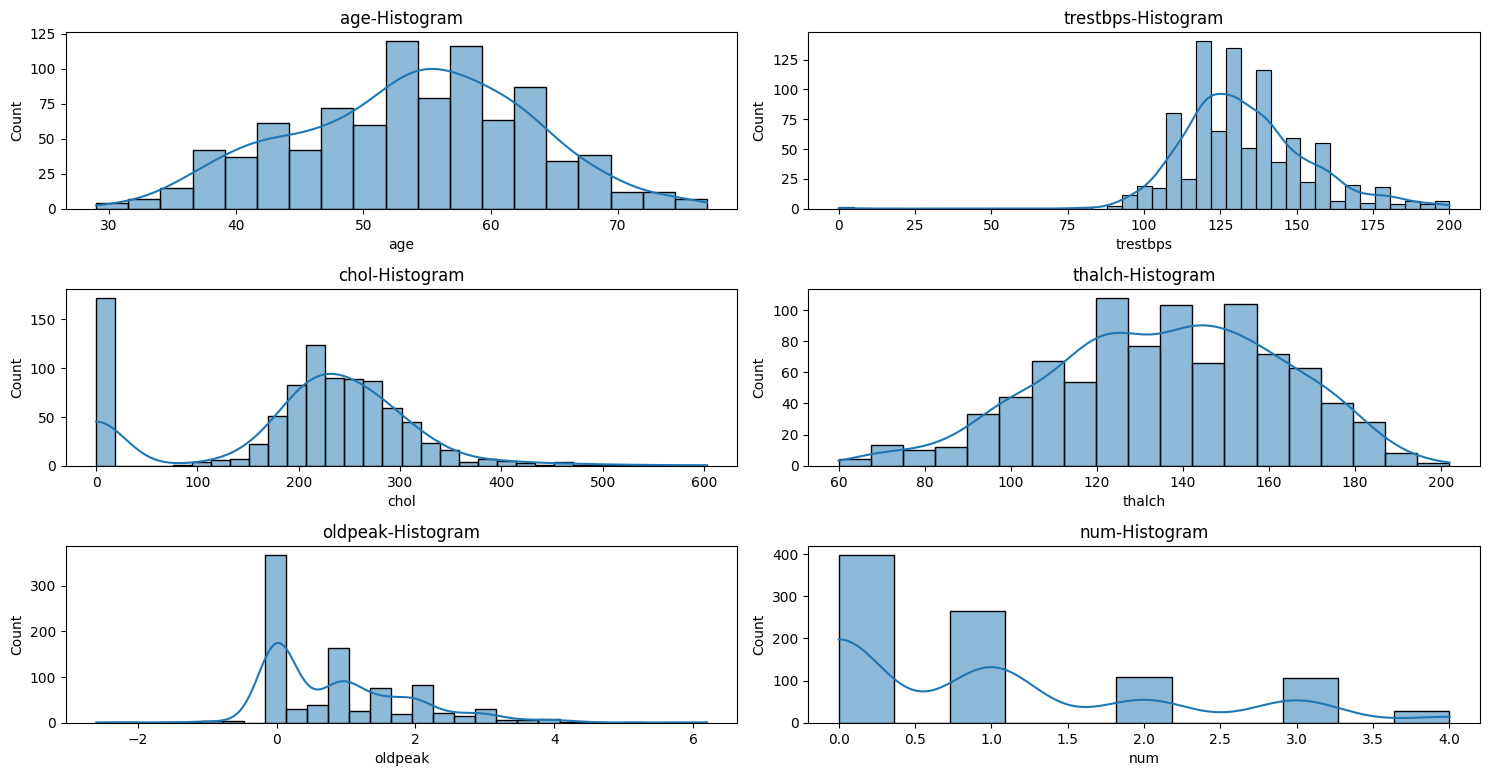

In [184]:
plt.figure(figsize=(15,10))
for i,column in enumerate(df[num_columns]):
    plt.subplot(len(num_columns)//2+1,2,i+1)
    sns.histplot(df[column],kde=True)
    plt.title(f'{column}-Histogram')
plt.tight_layout()    
plt.show()

In [185]:
target=df['num']
target

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [186]:
features=df.drop('num',axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect


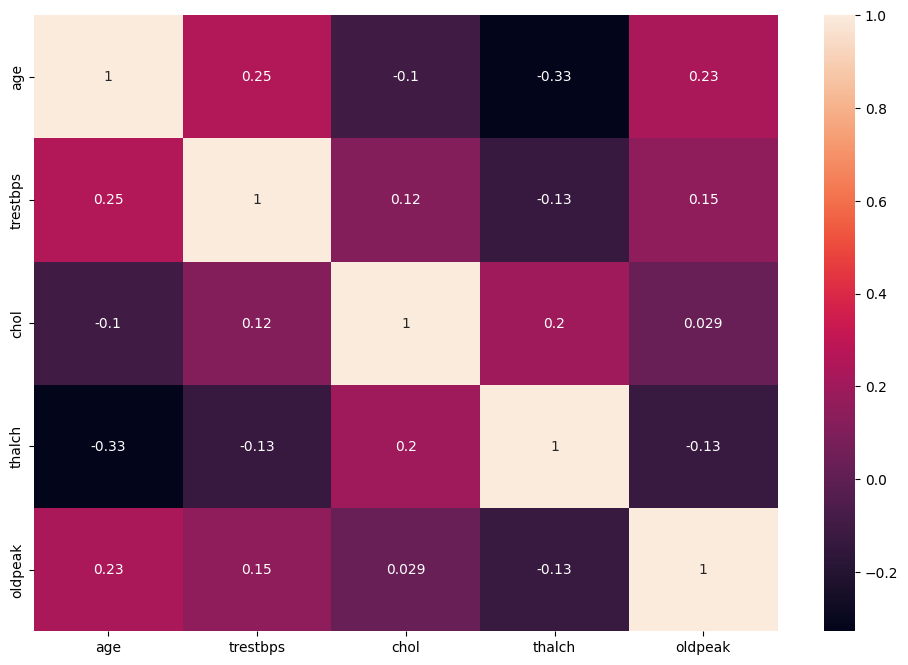

In [187]:
figure=plt.figure(figsize=(12,8))
sns.heatmap(features.corr(),annot=True)
plt.show()

In [188]:
features=pd.get_dummies(features,dtype='int')
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.300000,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,132,0.000000,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,148,0.400000,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,190,0.000000,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,126,1.500000,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.500000,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
904,62,166,170,120,3.000000,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
905,56,170,0,123,2.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,105,0.891253,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0


In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
std_sca=StandardScaler()

In [191]:
std_fea=std_sca.fit_transform(features)

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score

In [193]:
x_train,x_test,y_train,y_test=train_test_split(std_fea,target,train_size=0.80,random_state=100)

In [194]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 26)
(182, 26)
(726,)
(182,)


In [195]:
decision_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [196]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [197]:
y_pred=decision_tree.predict(x_test)

In [198]:
accuracy_score(y_test,y_pred)

0.5824175824175825

In [199]:
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(x_test), multi_class='ovr')
roc_auc

0.7448865428263676

In [200]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.5143043284604083

In [201]:
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.4784785224465457

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
params={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7],'splitter':['best','random']}


In [204]:
grid_ser=GridSearchCV(decision_tree,params)

In [205]:
grid_ser.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [206]:
grid_ser.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [207]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree

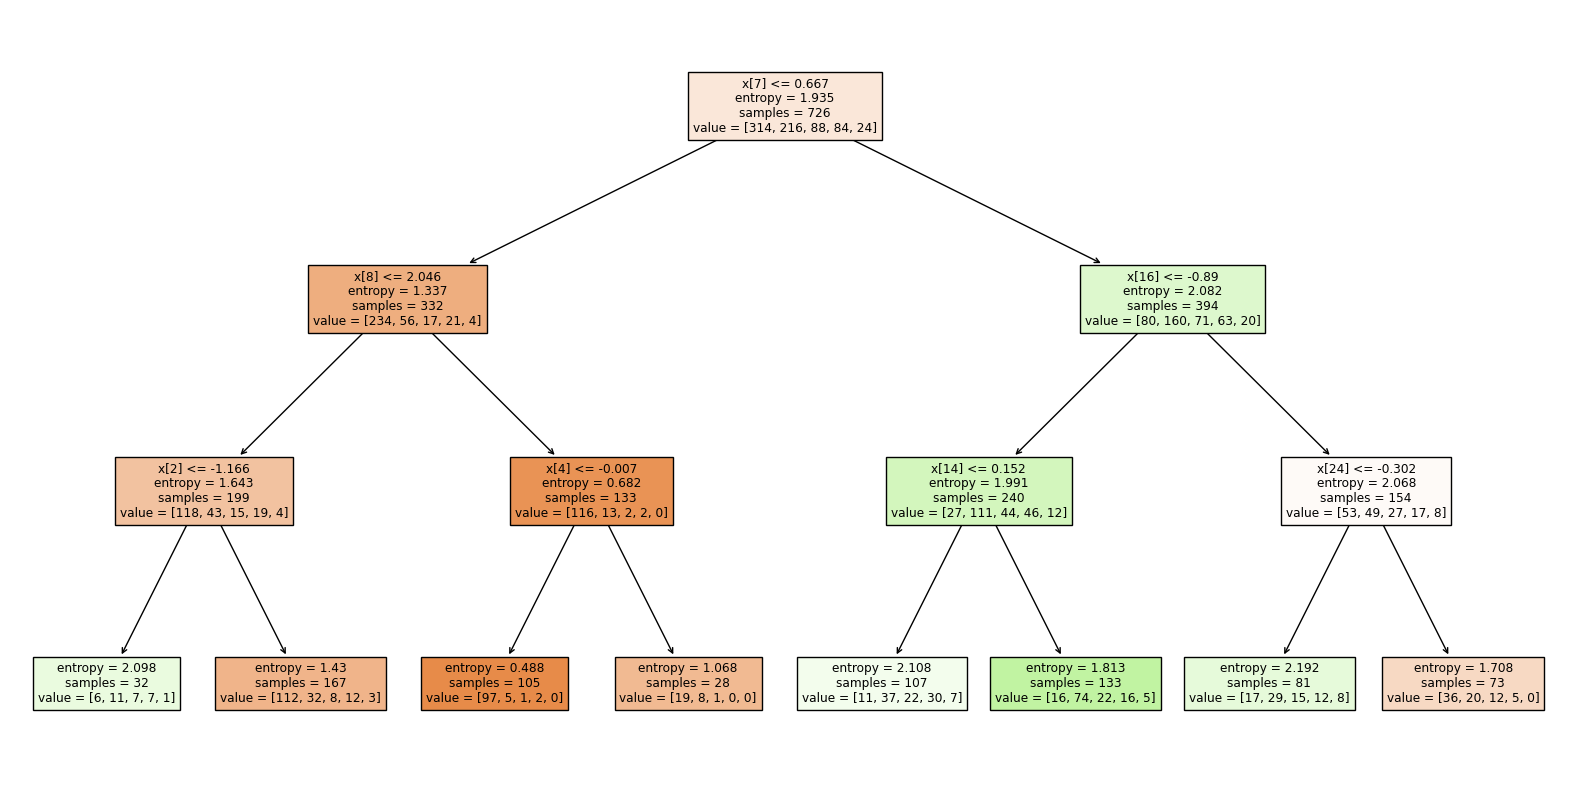

In [208]:
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, filled=True)
plt.show()

In [212]:
feature_importances = pd.DataFrame({'Feature': features.columns, 'Important': decision_tree.feature_importances_})
feature_importances = feature_importances.sort_values(by='Important', ascending=False)
feature_importances

,Feature,Important
7,cp_asymptomatic,0.565542
8,cp_atypical angina,0.105705
16,exang_False,0.096062
2,chol,0.083929
24,thal_normal,0.065550
14,restecg_normal,0.044497
4,oldpeak,0.038715
0,age,0.000000
23,thal_fixed defect,0.000000
22,slope_upsloping,0.000000


## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
   Max Depth,
   Min Samples Split,
   Min Samples Leaf,
   Max Features.
   These hyperparameters control the tree's size, complexity, and generalization, impacting its accuracy and tendency to    overfit or underfit.

## 2. What is the difference between the Label encoding and One-hot encoding?
   Label encoding replaces categories with numbers.
   One-hot encoding creates a separate column for each category with 0s and 1s to represent the presence of a category.